# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | British Airways has confirmed ...
1,✅ Trip Verified | Worst BA experience. I was s...
2,✅ Trip Verified | My daughter and I were deni...
3,✅ Trip Verified | Despite boarding being the u...
4,"Not Verified | Flight cancelled, no crew! 9th..."


In [ ]:
df.to_csv("BA_reviews.csv",index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Import Libaries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
nltk.download('wordnet')
import string
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv("BA_reviews.csv")
df = data.copy()

In [ ]:
# df.drop(columns= "Unnamed: 0", inplace=True)
df.head()

,reviews
0,Not Verified | British Airways has confirmed ...
1,✅ Trip Verified | Worst BA experience. I was s...
2,✅ Trip Verified | My daughter and I were deni...
3,✅ Trip Verified | Despite boarding being the u...
4,"Not Verified | Flight cancelled, no crew! 9th..."


From the sample shown above 👆, each review starts with ✅ Trip Verified | or Not Verified |. This is not needed for our analysis and has to be removed.

In [ ]:
# Remove the ✅ Trip Verified | and Not Verified | from Review column
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df.head()

,reviews
0,British Airways has confirmed itself as the ...
1,Worst BA experience. I was supposed to fly ou...
2,My daughter and I were denied boarding on ou...
3,Despite boarding being the usual free for all...
4,"Flight cancelled, no crew! 9th September 202..."


# Data Overview

In [ ]:
# Increase the display width
pd.options.display.max_colwidth = 300

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2127 non-null   object
dtypes: object(1)
memory usage: 28.6+ KB


In [ ]:
# Shape of the dataset
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 3650 rows and 1 columns


In [ ]:
# check for missing cells
df.isna().sum()

reviews    1523
dtype: int64

In [ ]:
df.dropna(axis=0,inplace = True)
df.isna().sum()

reviews    0
dtype: int64

# Data Cleaning

In [ ]:
from IPython.lib.display import TextDisplayObject
# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

# Removing URL's
def remove_url(text):
  # replace url with empty string (nothing)
    return re.sub(r'http\S+', '', text)

# Removing special_character and convert the text to lowercase
def remove_special_character(text):
  return "".join([word.lower() for word in text if word not in string.punctuation])

# # Function to clean the text applying the preceeding functions
# def clean_text(text):
#     text = contraction_expansion(text)
#     text = remove_url(text)
#     text = remove_special_character(text)
#     return text

In [ ]:
# Function to clean the text applying the preceeding functions
def clean_text(text):
    if isinstance(text, str):
        text = contraction_expansion(text)
        text = remove_url(text)
        text = remove_special_character(text)
    return text

In [ ]:
df['reviews_clean'] = df['reviews'].apply(lambda x: clean_text(str(x)))
df.head(5)

,reviews,reviews_clean
0,"British Airways has confirmed itself as the worst airline in the UK. Last minute cancellation, no explanation, refusal to book with another airline “because we don’t have an arrangement with them”. What’s happened to what used to be our national airline?",british airways has confirmed itself as the worst airline in the uk last minute cancellation no explanation refusal to book with another airline “because we don’t have an arrangement with them” what’s happened to what used to be our national airline
1,Worst BA experience. I was supposed to fly out to Italy on 7 September 2023. I arrived at OR Tambo International airport ready to check my bags in (I already checked-in online the previous evening so I had my boarding pass ready). At the counter I was told that I had been off-loaded from the fl...,worst ba experience i was supposed to fly out to italy on 7 september 2023 i arrived at or tambo international airport ready to check my bags in i already checkedin online the previous evening so i had my boarding pass ready at the counter i was told that i had been offloaded from the flight as...
2,"My daughter and I were denied boarding on our business class flight from Madrid to Heathrow in March 25, 2023, the first leg on our return flight to Victoria, Canada. No reason was given for the denied boarding by the check in staff at the British Airways counter in Madrid, who said they were ...",my daughter and i were denied boarding on our business class flight from madrid to heathrow in march 25 2023 the first leg on our return flight to victoria canada no reason was given for the denied boarding by the check in staff at the british airways counter in madrid who said they were only ...
3,"Despite boarding being the usual free for all at LHR with groups 1-3 being called to board all at once. Whilst those passengers who had agreed to check in a bag in at the gate, getting to board before anyone else! However, the service on board was impeccable. Superb crew, friendly, attentive, i...",despite boarding being the usual free for all at lhr with groups 13 being called to board all at once whilst those passengers who had agreed to check in a bag in at the gate getting to board before anyone else however the service on board was impeccable superb crew friendly attentive interactin...
4,"Flight cancelled, no crew! 9th September 2023, not peak holiday period so why such bad management by BA? Sent to the gate left standing of over and hour and then flight cancelled. As were other on that day. Why does BA continue to provide such poor service - a national disgrace.",flight cancelled no crew 9th september 2023 not peak holiday period so why such bad management by ba sent to the gate left standing of over and hour and then flight cancelled as were other on that day why does ba continue to provide such poor service a national disgrace


# Tokenization

In [ ]:
# Tokenize the text
def tokenize(text):
  tokens = re.split('\W+', text)
  return tokens

In [ ]:
df['reviews_tokenized']=df['reviews_clean'].apply(tokenize)
df.head(5)

,reviews,reviews_clean,reviews_tokenized
0,"British Airways has confirmed itself as the worst airline in the UK. Last minute cancellation, no explanation, refusal to book with another airline “because we don’t have an arrangement with them”. What’s happened to what used to be our national airline?",british airways has confirmed itself as the worst airline in the uk last minute cancellation no explanation refusal to book with another airline “because we don’t have an arrangement with them” what’s happened to what used to be our national airline,"[, british, airways, has, confirmed, itself, as, the, worst, airline, in, the, uk, last, minute, cancellation, no, explanation, refusal, to, book, with, another, airline, because, we, don, t, have, an, arrangement, with, them, what, s, happened, to, what, used, to, be, our, national, airline]"
1,Worst BA experience. I was supposed to fly out to Italy on 7 September 2023. I arrived at OR Tambo International airport ready to check my bags in (I already checked-in online the previous evening so I had my boarding pass ready). At the counter I was told that I had been off-loaded from the fl...,worst ba experience i was supposed to fly out to italy on 7 september 2023 i arrived at or tambo international airport ready to check my bags in i already checkedin online the previous evening so i had my boarding pass ready at the counter i was told that i had been offloaded from the flight as...,"[, worst, ba, experience, i, was, supposed, to, fly, out, to, italy, on, 7, september, 2023, i, arrived, at, or, tambo, international, airport, ready, to, check, my, bags, in, i, already, checkedin, online, the, previous, evening, so, i, had, my, boarding, pass, ready, at, the, counter, i, was, ..."
2,"My daughter and I were denied boarding on our business class flight from Madrid to Heathrow in March 25, 2023, the first leg on our return flight to Victoria, Canada. No reason was given for the denied boarding by the check in staff at the British Airways counter in Madrid, who said they were ...",my daughter and i were denied boarding on our business class flight from madrid to heathrow in march 25 2023 the first leg on our return flight to victoria canada no reason was given for the denied boarding by the check in staff at the british airways counter in madrid who said they were only ...,"[, my, daughter, and, i, were, denied, boarding, on, our, business, class, flight, from, madrid, to, heathrow, in, march, 25, 2023, the, first, leg, on, our, return, flight, to, victoria, canada, no, reason, was, given, for, the, denied, boarding, by, the, check, in, staff, at, the, british, air..."
3,"Despite boarding being the usual free for all at LHR with groups 1-3 being called to board all at once. Whilst those passengers who had agreed to check in a bag in at the gate, getting to board before anyone else! However, the service on board was impeccable. Superb crew, friendly, attentive, i...",despite boarding being the usual free for all at lhr with groups 13 being called to board all at once whilst those passengers who had agreed to check in a bag in at the gate getting to board before anyone else however the service on board was impeccable superb crew friendly attentive interactin...,"[, despite, boarding, being, the, usual, free, for, all, at, lhr, with, groups, 13, being, called, to, board, all, at, once, whilst, those, passengers, who, had, agreed, to, check, in, a, bag, in, at, the, gate, getting, to, board, before, anyone, else, however, the, service, on, board, was, imp..."
4,"Flight cancelled, no crew! 9th September 2023, not peak holiday period so why such bad management by BA? Sent to the gate left standing of over and hour and then flight cancelled. As were other on that day. Why does BA continue to provide such poor service - a national disgrace.",flight cancelled no crew 9th september 2023 not peak holiday period so why such bad management by ba sent to the gate left standing of over and hour and then flig

# Lematization and Stopwords removal

In [ ]:
# Customize the preset stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('english')
# print the default stopwords
print(set(stop_words))

{"needn't", 'they', 'have', 'other', 'that', 'against', 'i', 'their', 'are', 'through', 'most', 'wasn', 'what', 'a', 'how', 'such', 'ours', "didn't", 'my', 'doesn', 'won', "mustn't", 'were', 'couldn', 'whom', 'once', 'only', "isn't", "haven't", 'can', 'just', 'the', 'needn', 'each', 'about', 'when', 'there', "weren't", 'or', 'ain', 'should', 'here', 'didn', 'our', 'aren', 'but', 'did', 'into', 'not', 'yourselves', "don't", 'no', 'own', 'in', 'too', 're', 'down', 'further', 'before', 'you', 'them', 've', 'then', 'been', 'd', 'up', 'where', 'its', 'don', 'yourself', 'we', 'for', "should've", 'out', 'o', 'above', 'these', 'which', 'had', "couldn't", 'being', 'who', 'both', 'so', 'under', 'll', 'she', "wasn't", "won't", 'any', 'will', 'an', 'is', 'it', 'does', "hadn't", 'as', 'below', "hasn't", 'nor', 'your', 'his', "aren't", 'theirs', 'off', 'me', 'between', 'm', 'her', 'more', 'wouldn', 'doing', 'after', "doesn't", 'very', 'all', 'itself', 'hers', 'shouldn', 'until', 'y', 't', 'has', "sh

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Negative reviews often include 'not' in their expressions. This would be removed from stopwords so as easily identify negative reviews

In [ ]:
#Removing 'not' from the stop word as this is mostly used to express negative Reviews
# Adding ('would','shall','might','could') to the stopwords
new_stopwords = ['would','shall','might','could']
stop_words.extend(new_stopwords)
stop_words.remove('not')
stop_words = set(stop_words)
print(stop_words)

{"needn't", 'they', 'have', 'other', 'that', 'against', 'i', 'their', 'are', 'through', 'most', 'wasn', 'what', 'a', 'how', 'such', 'ours', "didn't", 'my', 'doesn', 'won', "mustn't", 'were', 'couldn', 'whom', 'once', 'only', "isn't", "haven't", 'can', 'just', 'the', 'needn', 'each', 'about', 'when', 'there', "weren't", 'or', 'ain', 'should', 'here', 'didn', 'our', 'aren', 'but', 'did', 'into', 'yourselves', "don't", 'no', 'own', 'in', 'too', 're', 'down', 'further', 'before', 'you', 'them', 've', 'then', 'been', 'd', 'up', 'where', 'its', 'don', 'yourself', 'we', 'for', "should've", 'out', 'o', 'above', 'these', 'which', 'had', "couldn't", 'being', 'who', 'both', 'so', 'under', 'll', 'she', "wasn't", "won't", 'any', 'will', 'an', 'is', 'it', 'does', 'might', "hadn't", 'as', 'below', "hasn't", 'nor', 'your', 'his', "aren't", 'theirs', 'off', 'me', 'between', 'm', 'her', 'more', 'wouldn', 'doing', 'after', "doesn't", 'very', 'could', 'all', 'itself', 'hers', 'shouldn', 'until', 'y', 't',

In [ ]:
# Lematize each token and remove stopwords
def lamatize_remove_stopwords(tokens):
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  text = ' '.join(map(str,text))
  return text

In [ ]:
df['reviews_lematized']=df['reviews_tokenized'].apply(lamatize_remove_stopwords)
df.head(5)

,reviews,reviews_clean,reviews_tokenized,reviews_lematized
0,"British Airways has confirmed itself as the worst airline in the UK. Last minute cancellation, no explanation, refusal to book with another airline “because we don’t have an arrangement with them”. What’s happened to what used to be our national airline?",british airways has confirmed itself as the worst airline in the uk last minute cancellation no explanation refusal to book with another airline “because we don’t have an arrangement with them” what’s happened to what used to be our national airline,"[, british, airways, has, confirmed, itself, as, the, worst, airline, in, the, uk, last, minute, cancellation, no, explanation, refusal, to, book, with, another, airline, because, we, don, t, have, an, arrangement, with, them, what, s, happened, to, what, used, to, be, our, national, airline]",british airway confirmed worst airline uk last minute cancellation explanation refusal book another airline arrangement happened used national airline
1,Worst BA experience. I was supposed to fly out to Italy on 7 September 2023. I arrived at OR Tambo International airport ready to check my bags in (I already checked-in online the previous evening so I had my boarding pass ready). At the counter I was told that I had been off-loaded from the fl...,worst ba experience i was supposed to fly out to italy on 7 september 2023 i arrived at or tambo international airport ready to check my bags in i already checkedin online the previous evening so i had my boarding pass ready at the counter i was told that i had been offloaded from the flight as...,"[, worst, ba, experience, i, was, supposed, to, fly, out, to, italy, on, 7, september, 2023, i, arrived, at, or, tambo, international, airport, ready, to, check, my, bags, in, i, already, checkedin, online, the, previous, evening, so, i, had, my, boarding, pass, ready, at, the, counter, i, was, ...",worst ba experience supposed fly italy 7 september 2023 arrived tambo international airport ready check bag already checkedin online previous evening boarding pas ready counter told offloaded flight connecting flight cancelled information sent regarding beforehand team checkin counter tried get...
2,"My daughter and I were denied boarding on our business class flight from Madrid to Heathrow in March 25, 2023, the first leg on our return flight to Victoria, Canada. No reason was given for the denied boarding by the check in staff at the British Airways counter in Madrid, who said they were ...",my daughter and i were denied boarding on our business class flight from madrid to heathrow in march 25 2023 the first leg on our return flight to victoria canada no reason was given for the denied boarding by the check in staff at the british airways counter in madrid who said they were only ...,"[, my, daughter, and, i, were, denied, boarding, on, our, business, class, flight, from, madrid, to, heathrow, in, march, 25, 2023, the, first, leg, on, our, return, flight, to, victoria, canada, no, reason, was, given, for, the, denied, boarding, by, the, check, in, staff, at, the, british, air...",daughter denied boarding business class flight madrid heathrow march 25 2023 first leg return flight victoria canada reason given denied boarding check staff british airway counter madrid said agent told u call british airway three hour early flight valid passport many try finally reached briti...
3,"Despite boarding being the usual free for all at LHR with groups 1-3 being called to board all at once. Whilst those passengers who had agreed to check in a bag in at the gate, getting to board before anyone else! However, the service on board was impeccable. Superb crew, friendly, attentive, i...",despite boarding being the usual free for all at lhr with groups 13 being called to board all at once whilst those passengers who had agreed to check in a bag in at the gate getting to board before anyone else however the service on board was impeccable superb crew friendly atten

# WordCloud

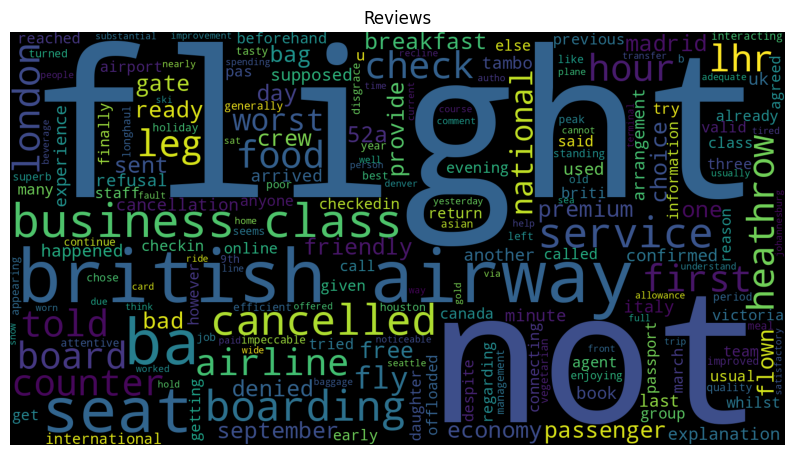

In [ ]:
sentences= df['reviews_lematized']
wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 15).generate(str(sentences))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title('Reviews')
plt.axis('off')
plt.show()

# Sentiment Analysis using VADER
VADER full meaning is Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment analysis can be used to categorize a statement as positive or negative; it also provides a nuanced understanding of the sentiment's strength and intensity. This means that, in addition to identifying whether the sentiment is positive or negative, it assigns a score that reflects the degree of emotion expressed in the text. This score helps in distinguishing between mildly and strongly positive or negative statements, making it a valuable tool for sentiment analysis and opinion mining in natural language processing applications.

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# function to calculate VADER sentiment
def sentimentanalysis(reviews):
    sentiment_scores = analyzer.polarity_scores(reviews)
    compound_score = sentiment_scores['compound']
    return compound_score

In [ ]:
# function to analyse
def analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['sentiment_score'] = df['reviews_lematized'].apply(sentimentanalysis)
df['analysis'] = df['sentiment_score'].apply(analysis)
df_new = df.drop(columns='reviews_tokenized')

In [ ]:
df_new.sample(n = 5)

,reviews,reviews_clean,reviews_lematized,sentiment_score,analysis
531,London Heathrow to Toronto. My wife and I used Avios and the BA Amex companion voucher to get a very good deal to fly business class on our holiday. I was also excited to fly on an A350 for the first time and it definitely lived up to my expectations. The breakfast buffet in the BA lounge in H...,london heathrow to toronto my wife and i used avios and the ba amex companion voucher to get a very good deal to fly business class on our holiday i was also excited to fly on an a350 for the first time and it definitely lived up to my expectations the breakfast buffet in the ba lounge in heat...,london heathrow toronto wife used avios ba amex companion voucher get good deal fly business class holiday also excited fly a350 first time definitely lived expectation breakfast buffet ba lounge heathrow t5 okay not amazing good range drink comfortable settee aircraft felt clean fresh good moo...,0.9895,Positive
1543,"This was my first flight from Toronto to London crewed by ""Mixed Fleet"". Easy check-in at Toronto Pearson (The BA ground staff are always great in Toronto) with fast track meant I was in the lounge 20 mins after arriving at the airport. The lounge remains well run with ok food and a limited (a...",this was my first flight from toronto to london crewed by mixed fleet easy checkin at toronto pearson the ba ground staff are always great in toronto with fast track meant i was in the lounge 20 mins after arriving at the airport the lounge remains well run with ok food and a limited average w...,first flight toronto london crewed mixed fleet easy checkin toronto pearson ba ground staff always great toronto fast track meant lounge 20 min arriving airport lounge remains well run ok food limited average wine list still bathroom seat tatty busy not relaxing place easy boarding first improv...,0.9944,Positive
2275,"Riyadh to Dusseldorf via Heathrow with British Airways. Check in at Riyadh was terrible, broken baggage belts and staff explaining to passangers that there is an issue instead of fixing it. Flight to LHR was smooth and with good service. LHR however was a disaster. Priority Security took forev...",riyadh to dusseldorf via heathrow with british airways check in at riyadh was terrible broken baggage belts and staff explaining to passangers that there is an issue instead of fixing it flight to lhr was smooth and with good service lhr however was a disaster priority security took forever an...,riyadh dusseldorf via heathrow british airway check riyadh terrible broken baggage belt staff explaining passangers issue instead fixing flight lhr smooth good service lhr however disaster priority security took forever gate agent even worse trolley handluggage specified first started complaini...,-0.8807,Negative
1659,London LGW to Lima. Booked to fly out in Premium Economy and back in Business overnight. I like BA’s website that allows you split classes like this. In the event got upgraded to Business both ways. No idea why. I am not a frequent flyer. Flights left and arrived on time. (Gatwick’s Sunday morn...,london lgw to lima booked to fly out in premium economy and back in business overnight i like ba’s website that allows you split classes like this in the event got upgraded to business both ways no idea why i am not a frequent flyer flights left and arrived on time gatwick’s sunday morning chec...,london lgw lima booked fly premium economy back business overnight like ba website allows split class like event got upgraded business way idea not frequent flyer flight left arrived time gatwick sunday morning check scrum awful ba cabin crew ground staff polite helpful food good outward slight...,0.2247,Neutral
1846,"Travelled British Airways from London to Kuala Lumpur return. Had a painful 13 hour fight as I had a window seat with a metal box in the leg room areas, which meant my feet were slanted to one side throughout the flight. On my way back, the inflight enterta

In [ ]:
# Check the number of reviews category
df_new['analysis'].value_counts()

Positive    986
Negative    876
Neutral     265
Name: analysis, dtype: int64

In [ ]:
sentiment_counts = df_new['analysis'].value_counts()

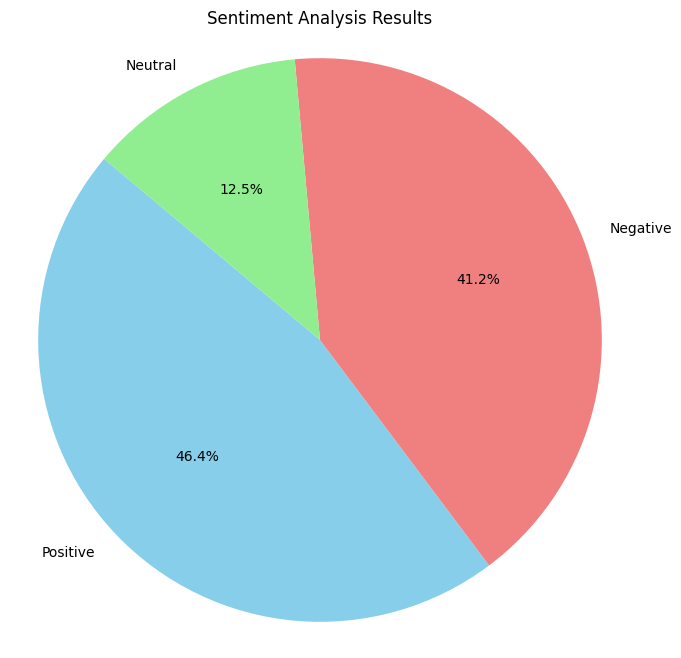

In [ ]:
# Define colors for the pie chart
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Analysis Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()